In [1]:
import pandas as pd
from mentat import *
import seaborn as sns

sns.set(rc={"figure.dpi":100, 'savefig.dpi':100})
sns.set_context('notebook')
sns.set_style("ticks")

In [2]:
data = pd.read_csv("../data/credit-bias-predictions.zip")

In [3]:
data.head()

,NewCreditCustomer,Amount,Interest,LoanDuration,Education,NrOfDependants,EmploymentDurationCurrentEmployer,IncomeFromPrincipalEmployer,IncomeFromPension,IncomeFromFamilyAllowance,...,Other,Owner,Owner_with_encumbrance,Tenant,Entrepreneur,Fully,Partially,Retiree,Self_employed,predicted_probabilities
0,False,530.0,10.68,36,4.0,NaN,5.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0.662289
1,False,530.0,21.57,24,4.0,NaN,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.749224
2,False,2300.0,15.62,36,4.0,0.0,6.0,1159.0,0.0,0.0,...,0,1,0,0,0,1,0,0,0,0.775058
3,True,530.0,27.36,36,4.0,NaN,6.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0.423509
4,True,4250.0,18.94,60,4.0,NaN,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.535847


In [4]:
labels = data.PaidLoan.astype(int).tolist()
probabilities = data.predicted_probabilities.tolist()

In [5]:
from metrics import ROC

roc = ROC(labels, probabilities, 1000)

In [6]:
x = list(roc.getFalsePositiveRates())
y = list(roc.getTruePositiveRates())

<AxesSubplot:title={'center':'Receiver operating characteristic'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

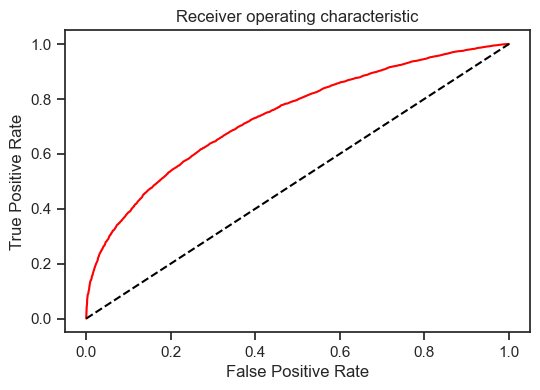

In [7]:
import seaborn as sns
import numpy as np

ax = sns.lineplot(x=x, y=y, color="red")
ax.set(xlabel="False Positive Rate", ylabel="True Positive Rate", title="Receiver operating characteristic")
identity = np.linspace(0, 1, 1000)
sns.lineplot(x=identity, y=identity, linestyle='--', color="black")